In [4]:
pwd

'C:\\Users\\woute\\Documents\\Reproduction_project\\HEAT_Reproduction'

In [5]:
import pickle
from plot import plot_graph_rplan, plot_polygons_rplan
import matplotlib.pyplot as plt
from utils import ROOM_ARRAY_Z
import numpy as np
from PIL import Image
import os

In [6]:
COLORS = [np.array(ROOM_ARRAY_Z[n][1])/255 for n in range(18)]

polygon = pickle.load(open('../RPLAN/geometry/5.pickle', 'rb'))

C:\Users\woute\AppData\Local\Temp\ipykernel_9116\563001981.py:3: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  polygon = pickle.load(open('../RPLAN/geometry/5.pickle', 'rb'))


<Figure size 640x480 with 0 Axes>

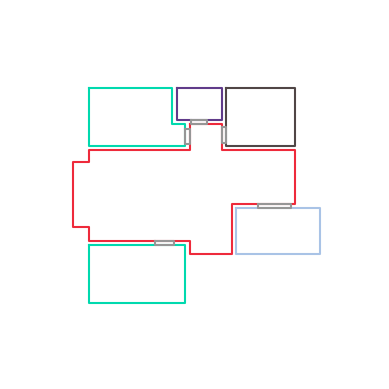

In [7]:
'''
This will print the plot 256px by 256px and save it to the file test.png.
TO DO:
1. The origional image is not square so we need to check wether the corners
   indicated in the geometry file are still in the correct location. 
   _>> the corners are not in the correct positons check with Krita.
2. It could be that the preprocessing step works better if the rooms are
   colored instead of white. If we want to use the preprosessing steps
'''
# Find the DPI of the screen
fig = plt.figure()
DPI = fig.dpi

# This create the figure.
# fig, axs = plt.subplots(figsize=(250/DPI, 250/DPI), dpi=DPI)
fig, axs = plt.subplots()
# This makes the image based on the polygon input
plot_polygons_rplan(polygon, axs, colors=COLORS)

# Save the figure to a specified file name 
# this produces and figure of 640x480 which is to big
fig.savefig('../RPLAN/test.png') 

In [14]:
"""
This will change the colors of all the .png files from folder_dir to match those
of the density and normal images. 
"""

folder_dir = "..\heat\data\RPLAN_small\origional"
folder_density = r"..\heat\data\RPLAN_small\density"
folder_normals = r"..\heat\data\RPLAN_small\normals"

Background = (0,13,0,0)
Outer_wall = (127,14,0,0)
Inner_wall = (0,16,0,255)
Door = (0,17,0,255)
Front_door = (255,15,0,0)

#for density
dColor_Wall = (213,213,213,255) #white
dColor_Room = (66,66,66,255) #Gray
dColor_Background = (0,0,0,255) #Black

#for normal
nColor_Wall = (0,255,255,255)
nColor_Room = (255,0,0,255)
nColor_Background = (0,0,0,255) #Black

for image_nmr in os.listdir(folder_dir):
# check if the image ends with png
    if (image_nmr.endswith(".png")):
        
        # Iterate through each pixel in the image and change color to density color scheme
        density_image = Image.open(os.path.join(folder_dir,image_nmr))
        for x in range(density_image.width):
            for y in range(density_image.height):
                pixel_color = density_image.getpixel((x, y))
                if pixel_color in [Outer_wall,Inner_wall,Door,Front_door]:
                    density_image.putpixel((x, y), dColor_Wall) # use (0,0,0,0) for alpha channel
                if pixel_color == Background:
                    density_image.putpixel((x, y), dColor_Background)
                if pixel_color not in [Outer_wall,Inner_wall,Door,Front_door,Background]:
                    density_image.putpixel((x, y), dColor_Room)
        #Save the modified image to density folder
        density_image.save(os.path.join(folder_density,image_nmr))
        print(image_nmr,'Density done')
        
        
        # Iterate through each pixel and change color to normal color scheme
        normal_image = Image.open(os.path.join(folder_dir,image_nmr))
        for x in range(normal_image.width):
            for y in range(normal_image.height):
                pixel_color = normal_image.getpixel((x, y))
                if pixel_color in [Outer_wall,Inner_wall,Door,Front_door]:
                    normal_image.putpixel((x, y), nColor_Wall) # use (0,0,0,0) for alpha channel
                if pixel_color == Background:
                    normal_image.putpixel((x, y), nColor_Background)
                if pixel_color not in [Outer_wall,Inner_wall,Door,Front_door,Background]:
                    normal_image.putpixel((x, y), nColor_Room)
        #Save the modified image to normal folder
        normal_image.save(os.path.join(folder_normals,image_nmr))
        print(image_nmr,'Normal done')
        
    else:
        print(image_nmr, 'not a .png file')
        break


10.png Density done
10.png Normal done
11.png Density done
11.png Normal done
5.png Density done
5.png Normal done
7.png Density done
7.png Normal done
8.png Density done
8.png Normal done
